In [ ]:
!pip install opendatasets
import opendatasets as od

In [ ]:
od.download('https://www.kaggle.com/datasets/marquis03/flower-classification')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: saikoushikboyapati
Your Kaggle Key: ··········


100%|██████████| 205M/205M [00:01<00:00, 149MB/s]


In [ ]:
train_set = "/content/flower-classification/train"

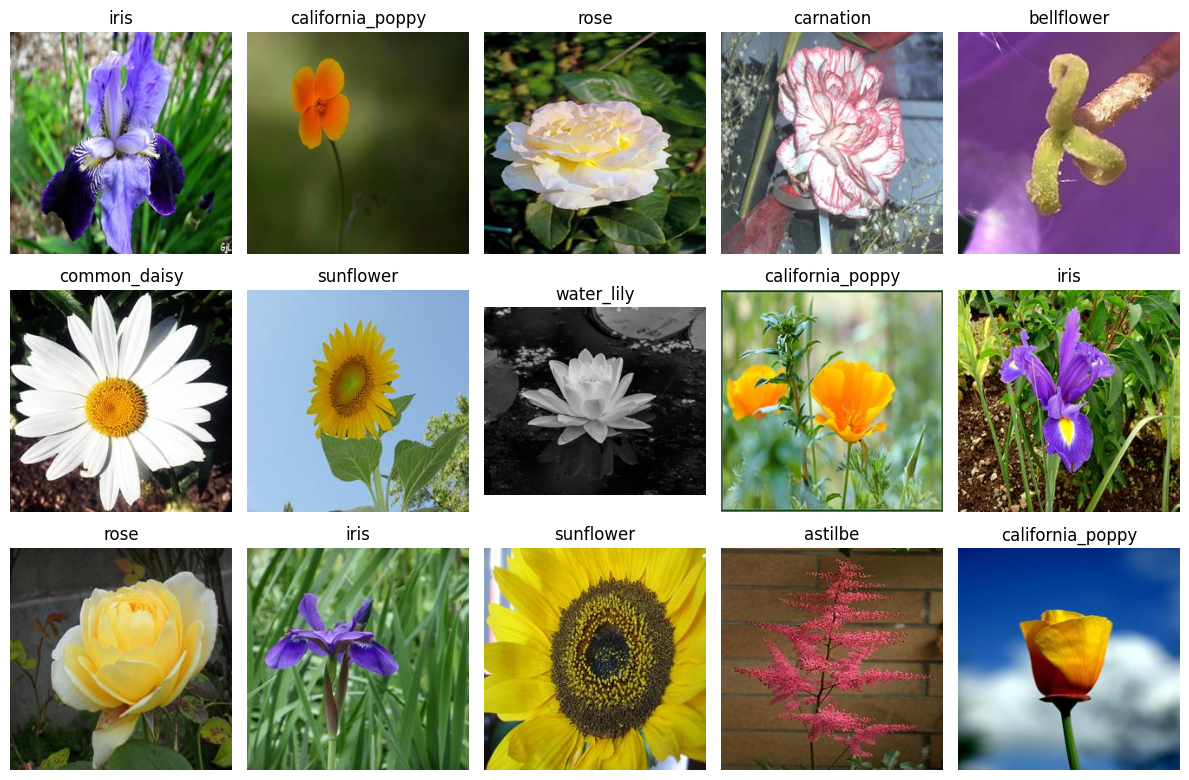

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

# Specify the path to your image directory
image_dir = train_set

# Retrieve all image paths recursively from the directory
image_paths = glob.glob(image_dir + '/**/*.jpg', recursive=True)

# Select a subset of images to display
num_images = 15
selected_images = np.random.choice(image_paths, num_images, replace=False)

# Create a grid plot to display the images
rows = 3  # Number of rows in the grid
cols = 5  # Number of columns in the grid
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

# Iterate over the selected images and display them on the grid
for i, image_path in enumerate(selected_images):
    row = i // cols
    col = i % cols
    img = plt.imread(image_path)
    axes[row, col].imshow(img)
    axes[row, col].axis('off')

    # Extract the subfolder name from the image path
    subfolder = os.path.basename(os.path.dirname(image_path))

    # Set the subfolder name as the subplot title
    axes[row, col].set_title(subfolder)

# Adjust the spacing between subplots and display the plot
plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.applications.mobilenet import MobileNet ,preprocess_input

In [ ]:
datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split = 0.2)

In [ ]:
train_data = datagen.flow_from_directory(
    train_set,
    target_size = (299,299),
    batch_size =16,
    class_mode = 'categorical',
    subset = 'training')

val_data = datagen.flow_from_directory(
    train_set,
    target_size = (299,299),
    batch_size =16,
    class_mode='categorical',
    subset = 'validation')

In [ ]:
print(train_data.class_indices)
print(val_data.class_indices)

In [ ]:
# Your dictionary
flower_labels = {
    'astilbe': 0,
    'bellflower': 1,
    'black_eyed_susan': 2,
    'calendula': 3,
    'california_poppy': 4,
    'carnation': 5,
    'common_daisy': 6,
    'coreopsis': 7,
    'dandelion': 8,
    'iris': 9,
    'rose': 10,
    'sunflower': 11,
    'tulip': 12,
    'water_lily': 13
}

# Extract the keys by directly accessing the dictionary's keys
keys = list(flower_labels.keys())

# Print the list of keys
print(keys)

['astilbe', 'bellflower', 'black_eyed_susan', 'calendula', 'california_poppy', 'carnation', 'common_daisy', 'coreopsis', 'dandelion', 'iris', 'rose', 'sunflower', 'tulip', 'water_lily']


In [ ]:

import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define the input shape for your specific task
input_shape = (299, 299, 3)  # Use (299, 299, 3) for Xception

# Load the pre-trained Xception model
base_model = Xception(weights='imagenet', input_shape=input_shape, include_top=False)

# Create your custom top layers for your specific task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # Add your desired number of units
output = Dense(14, activation='softmax')(x)  # Replace num_classes with your desired number of classes

# Create the custom model
model = Model(inputs=base_model.input, outputs=output)
model.summary()

83683744/83683744 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 149, 149, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_data, epochs= 3 , validation_data=val_data, workers=8, use_multiprocessing=True, batch_size = 32)

NameError: name 'train_data' is not defined

In [ ]:
model.save('/content/drive/MyDrive/Saved Data/Xception.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
from keras.models import load_model
model = load_model('/content/drive_backup/MyDrive/Saved Data/Xception.h5')


OSError: No file or directory found at /content/drive_backup/MyDrive/Saved Data/Xception.h5

In [ ]:
from keras.models import load_model
model = load_model('/content/drive_backup/MyDrive/Saved Data/Xception.h5')

OSError: No file or directory found at /content/drive_backup/MyDrive/Saved Data/Xception.h5

In [ ]:
# model.save('/content/drive/MyDrive/flower/Flowers_inceptionRenetV2_hybrid.h5')

In [ ]:
# from keras.models import load_model
# model = load_model('path of the model ')

In [ ]:
predictions = model.predict(val_data)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = val_data.classes
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels, predicted_labels)
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

NameError: name 'val_data' is not defined

In [ ]:
predictions = model.predict(val_data)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = val_data.classes
from sklearn.metrics import classification_report

report = classification_report(true_labels, predicted_labels, target_names=val_data.class_indices.keys())
print(report)

In [ ]:
img='/content/flower-classification/train/rose/1086116212_bd2adc7d81_c.jpg'

In [ ]:
import cv2

In [ ]:
def predict_disease(test_image):
  img = cv2.imread(test_image)
  img = img / 255.0
  img = cv2.resize(img, (299, 299))
  img = img.reshape(1,299,299,3)
  prediction = model.predict(img)
  pred_class = np.argmax(prediction, axis = -1)
  return pred_class

In [ ]:
pred=predict_disease(img)
d=pred[0]

In [ ]:
print(f'The detected stage is {keys[d]}jjjkkkkkkkb k                                  ')